In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
# load the data
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Regression\USA_Housing.csv')

In [3]:
# drop the Address column
ds.drop('Address',axis=1,inplace=True)

In [4]:
# scaling the data
scaler = MinMaxScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds),columns=ds.columns)

In [5]:
ds_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [6]:
# assigning the features and target
X = ds_scaled.drop('Price',axis=1)
y = ds_scaled['Price']

In [7]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# performing the Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=4,random_state=42)
GBR.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [9]:
y_pred = GBR.predict(X_test)

In [10]:
# printing the metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Mean Squared Error: 0.0019783842449571953
R2 Score: 0.8991140509107628
Mean Absolute Error: 0.03564523637434568


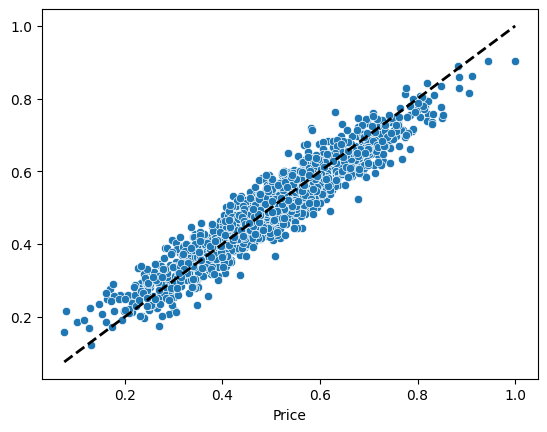

In [11]:
# plotting the scatter plot
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)

In [12]:
y_pred1 = GBR.predict(X_train)


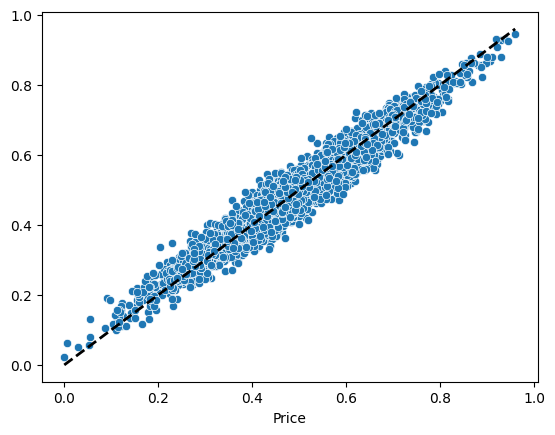

In [13]:
# plotting the scatter plot
sns.scatterplot(x=y_train,y=y_pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=2)